In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def IdeaLPF(height, width, radius=10):  # 理想低通滤波器
    u, v = np.mgrid[-1:1:2.0/height, -1:1:2.0/width]
    Dist = cv.magnitude(u, v)  # 距离
    D0 = radius / height  # 滤波器半径
    kernel = np.zeros((height, width), np.uint8)
    kernel[Dist <= D0] = 1
    return kernel

In [3]:
def ButterworthLPF(height, width, radius=10, n=2):  # 巴特沃斯低通滤波器
    # Butterworth：kern = 1/(1+(D/D0)^2n)
    u, v = np.mgrid[-1:1:2.0/height, -1:1:2.0/width]
    Dist = cv.magnitude(u, v)  # 距离
    D0 = radius/height  # 滤波器半径
    kernel = 1.0 / (1.0 + np.power(Dist/D0, 2*n))
    return kernel

In [4]:
def GaussianLPF(height, width, radius=10):  # 高斯低通滤波器
    # Gaussian：kern = exp(-D^2/(2*D0^2))
    u, v = np.mgrid[-1:1:2.0/height, -1:1:2.0/width]
    Dist = cv.magnitude(u, v)  # 距离
    D0 = radius / height  # 滤波器半径
    kernel = np.exp(-(Dist**2)/(2*D0**2))
    return kernel

In [6]:
height, width = 128, 128
r = 32

In [7]:
ILPF = IdeaLPF(height, width, radius=r)
BLPF = ButterworthLPF(height, width, radius=r, n=2)
GLPF = GaussianLPF(height, width, radius=r)
filters = ["ILPF", "BLPF", "GLPF"]
u, v = np.mgrid[-1:1:2.0/width, -1:1:2.0/height]

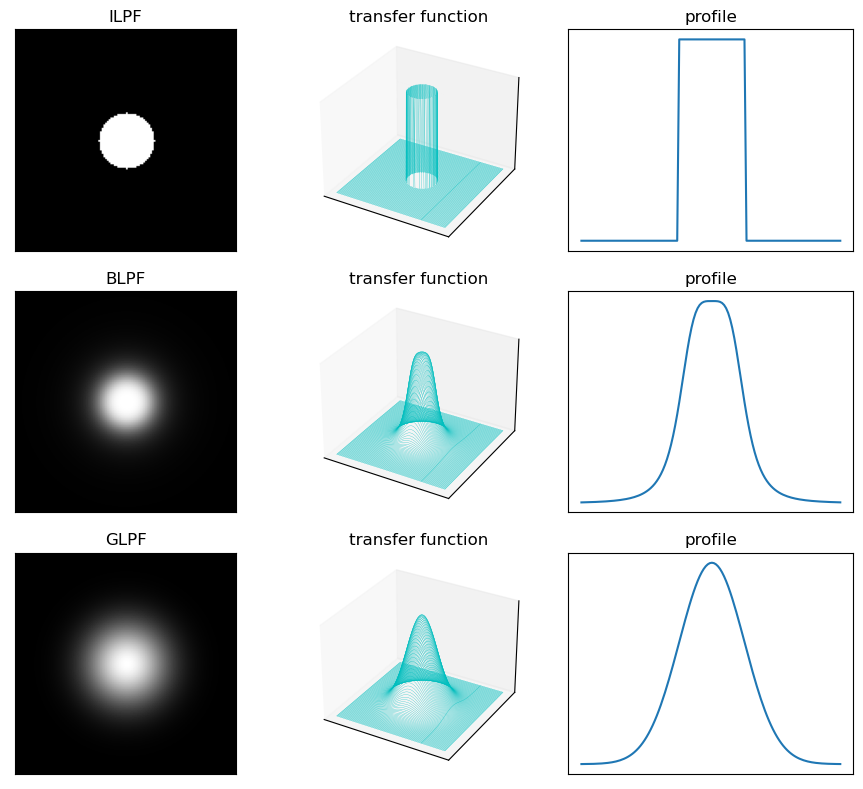

In [8]:
fig = plt.figure(figsize=(9, 8))
for i in range(3):
    filterLP = eval(filters[i]).copy()
    ax1 = fig.add_subplot(3, 3, 3*i+1)
    ax1.imshow(filterLP, 'gray')
    ax1.set_title(filters[i]), ax1.set_xticks([]), ax1.set_yticks([])
    ax2 = plt.subplot(3,3,3*i+2, projection='3d')
    ax2.set_title("transfer function")
    ax2.plot_wireframe(u, v, filterLP, rstride=100, linewidth=0.2, color='c')
    ax2.set_xticks([]), ax2.set_yticks([]), ax2.set_zticks([])
    ax3 = plt.subplot(3,3,3*i+3)
    profile = filterLP[:, width//2]
    ax3.plot(profile), ax3.set_title("profile")
    ax3.set_xticks([]), ax3.set_yticks([])

plt.tight_layout()
plt.show()